In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load Dataset
df = pd.read_csv('/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/Night_Light_Data - Night_Light_Data2.csv')  

In [3]:
# Display first few rows
display(df.head())

,Index,lat,lon,2023,2024
0,1,23.141503,77.485499,17.463333,15.901818
1,2,24.822467,87.966962,12.949167,10.097273
2,3,29.519892,74.335958,2.634167,2.740000
3,4,27.297038,81.541637,1.850833,1.359091
4,5,27.486920,78.792170,17.047501,15.980000


In [4]:
# Check basic info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1383 non-null   int64  
 1   lat     1383 non-null   float64
 2   lon     1383 non-null   float64
 3   2023    1383 non-null   float64
 4   2024    1383 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 54.1 KB


None

In [5]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Index    0
lat      0
lon      0
2023     0
2024     0
dtype: int64


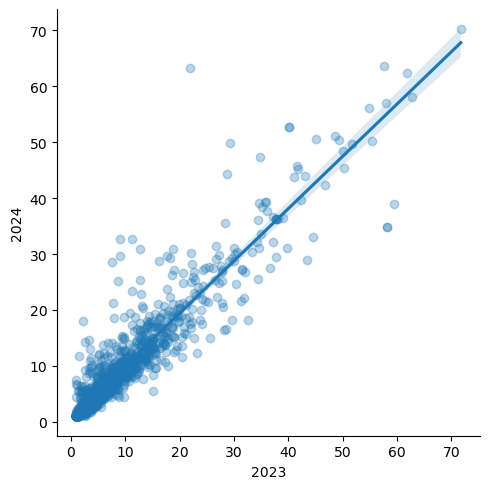

In [6]:
sns.lmplot(x='2023', y='2024', data=df, scatter_kws={'alpha':0.3})
plt.show()

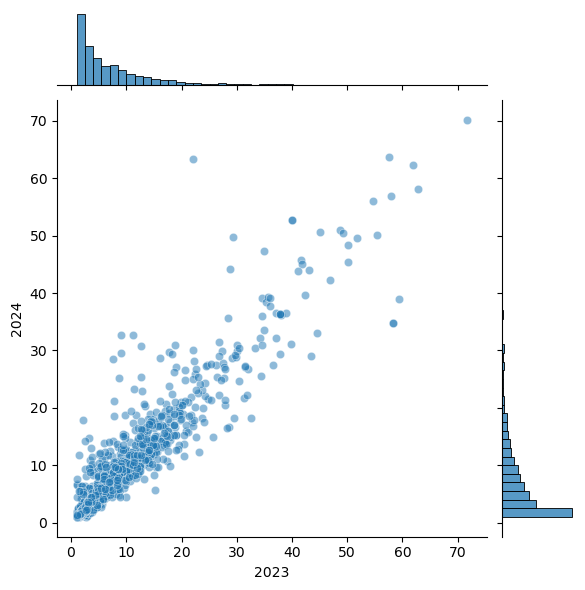

In [7]:
sns.jointplot(x='2023', y='2024', data=df, alpha=0.5)
plt.show()

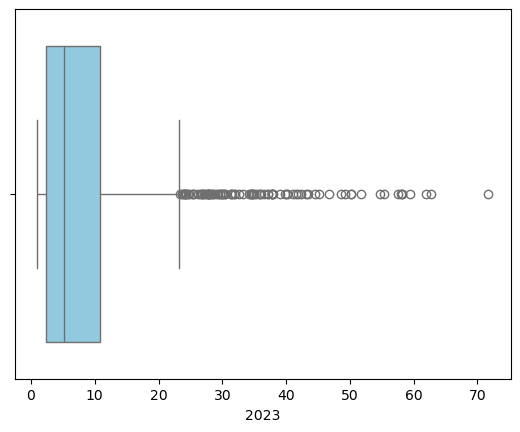

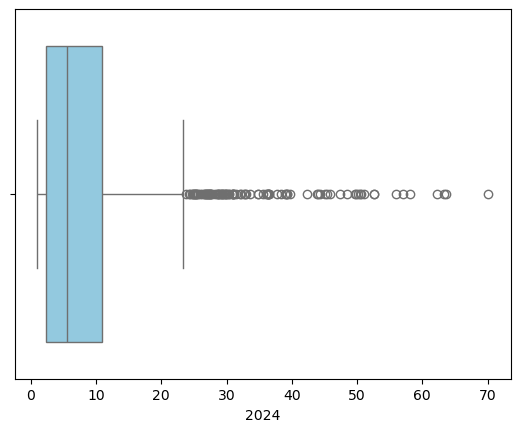

In [8]:
for col in ['2023', '2024']:
    sns.boxplot(x=df[col], color='skyblue')
    plt.show()

In [10]:
X = df[['2023', '2024']].values


In [11]:
y = X[:, 1] + (X[:, 1] - X[:, 0]) # Estimate 2025 as 2024 + (2024 - 2023)

In [12]:
# Splitting into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [13]:
# Standardization (Normalization)
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [14]:
# Creating & Training Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Model Coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept (b): {model.intercept_}')

Coefficients: [-9.1588693  18.22513083]
Intercept (b): 8.45374223750003


In [16]:
y_pred = model.predict(X_test)

In [17]:
# Model Evaluation
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R² Score: {r2_score(y_test, y_pred)}')

MSE: 1.4184633955172717e-28
R² Score: 1.0


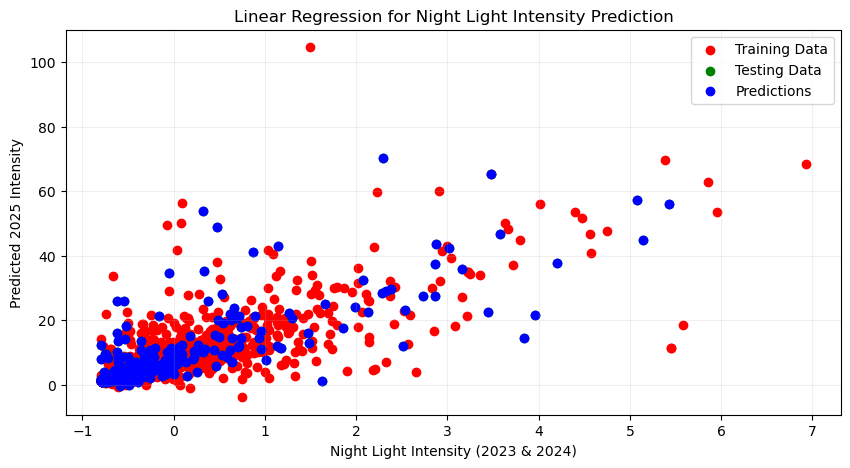

In [18]:
# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 0], y_train, color='red', label="Training Data")  
plt.scatter(X_test[:, 0], y_test, color='green', label='Testing Data')  
plt.scatter(X_test[:, 0], y_pred, color='blue', label="Predictions")  
plt.xlabel('Night Light Intensity (2023 & 2024)')
plt.ylabel('Predicted 2025 Intensity')
plt.title('Linear Regression for Night Light Intensity Prediction')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

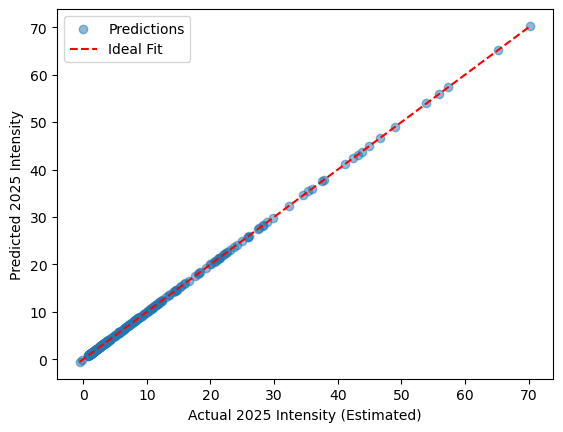

In [19]:
plt.scatter(y_test, y_pred, label='Predictions', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Ideal Fit")
plt.xlabel('Actual 2025 Intensity (Estimated)')
plt.ylabel('Predicted 2025 Intensity')
plt.legend()
plt.show()

In [20]:
# Save new CSV file with predictions
df['2025_predicted'] = model.predict(scaler.transform(df[['2023', '2024']]))
display(df[['Index', '2023', '2024', '2025_predicted']])
df.to_csv('2025predictions.csv', index=False)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,Index,2023,2024,2025_predicted
0,1,17.463333,15.901818,14.340303
1,2,12.949167,10.097273,7.245378
2,3,2.634167,2.740000,2.845833
3,4,1.850833,1.359091,0.867349
4,5,17.047501,15.980000,14.912498
...,...,...,...,...
1378,1379,1.615833,1.457273,1.298712
1379,1380,28.259167,16.401817,4.544468
1380,1381,2.675000,2.256364,1.837727
1381,1382,1.090000,1.362727,1.635455
